In [56]:
import csv
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [57]:
data = pd.read_csv('rezultati.csv')

print(data)

M = data['M']

     M    Ih     I
0  1.0  2890  1421
1  1.2  2889  1841
2  1.4  2888  2147
3  1.6  2888  2459
4  1.8  2888  2774
5  2.0  2890  3107


In [61]:
def fit_func(x, a, b):
    return x*a+b

N = 3
Nh = 154
Rh = 0.2
r = 0.1216/2

S = math.pi*r**2

mu0 = 4*math.pi*10**-7

x = [(4/5)**(3/2) *N*Nh*S/Rh *row['I']*row['Ih']*10**-6 for index,row in data.iterrows()]
y = list(M)
print(x,y)

[78.83079607203665, 102.09519946666092, 119.02363922120293, 136.32004138096787, 153.7827550999613, 172.36262026447423] [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]


In [63]:
params = curve_fit(
    fit_func, x, y)
a = params[0][0]
b = params[0][1]

# CALCULATE ERRORS FROM MATRIX
errs = np.sqrt(np.diag(params[1]))
print('a =', a,'+-',errs[0], '\nb =', b,'+-',errs[1])

a = 0.010910526615970717 +- 0.0002696765874045213 
b = 0.11360838175029349 +- 0.03528978748733915


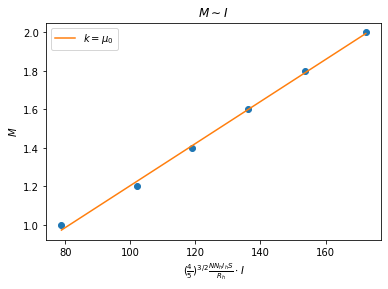

In [65]:
x_fit = np.linspace(x[0], x[-1], 100)

y_fit = fit_func(x_fit, a, b)

plt.plot(x, y, 'o')
plt.plot(x_fit, y_fit, label=r'$k = \mu_0$')

plt.title(r'$M \sim I$')
plt.ylabel(r'$M$')
plt.xlabel(r'$(\frac{4}{5})^{3/2} \frac{N N_h I_h S}{R_h}\cdot I$')

#plt.grid(True)

plt.legend()
plt.show()